<a href="https://colab.research.google.com/github/RaisB17/deep_learning/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow RNN, LSTM, GRU models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


# Preprocessing

In [ ]:
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                

In [ ]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/ReviewTokoBaju.csv"
df = pd.read_csv(url)

In [ ]:
texts = df['Review Text'].fillna('').values  # isi kosong jadi string kosong
labels = df['Recommended IND'].values

In [ ]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # hapus karakter selain huruf
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    return text

In [ ]:
texts = np.array([clean_text(t) for t in texts])

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)
y = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RNN model

In [ ]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=maxlen),
    SimpleRNN(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.8196 - loss: 0.4544 - val_accuracy: 0.8659 - val_loss: 0.3392
Epoch 2/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8776 - loss: 0.2993 - val_accuracy: 0.8474 - val_loss: 0.3807
Epoch 3/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.8901 - loss: 0.2839 - val_accuracy: 0.8680 - val_loss: 0.3186
Epoch 4/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9159 - loss: 0.2145 - val_accuracy: 0.8802 - val_loss: 0.3297
Epoch 5/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9374 - loss: 0.1709 - val_accuracy: 0.8719 - val_loss: 0.3422
Epoch 6/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9574 - loss: 0.1270 - val_accuracy: 0.8621 - val_loss: 0.3991
Epoch 7/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9643 - loss: 0.1055 - val_accuracy: 0.8657 - val_loss: 0.4463
Epoch 8/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9734 - loss: 0.0772 - 

In [ ]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

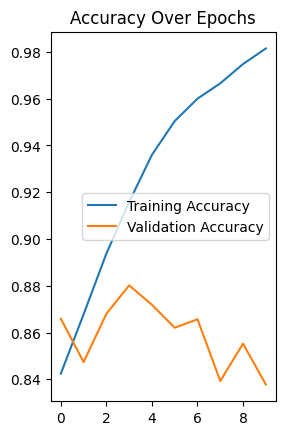

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

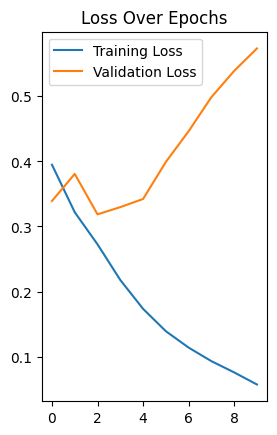

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int32')

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


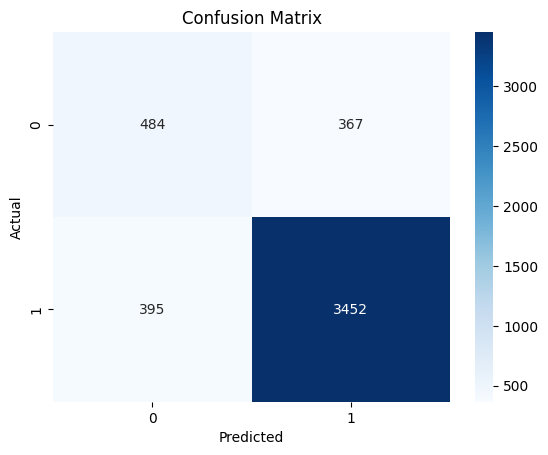

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5506    0.5687    0.5595       851
           1     0.9039    0.8973    0.9006      3847

    accuracy                         0.8378      4698
   macro avg     0.7273    0.7330    0.7301      4698
weighted avg     0.8399    0.8378    0.8388      4698



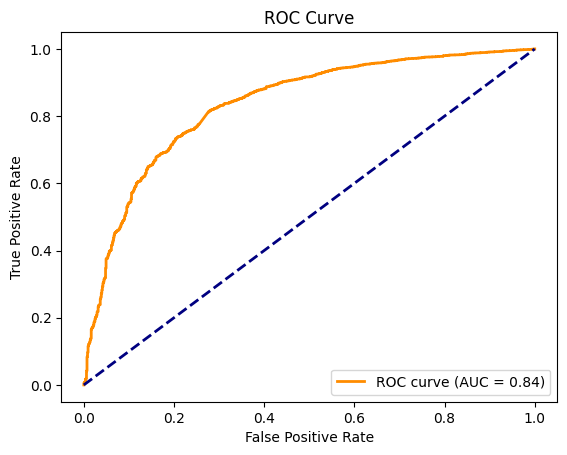

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# LSTM model

In [ ]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=maxlen),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8381 - loss: 0.3905 - val_accuracy: 0.8929 - val_loss: 0.2619
Epoch 2/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.9081 - loss: 0.2195 - val_accuracy: 0.8970 - val_loss: 0.2529
Epoch 3/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9296 - loss: 0.1797 - val_accuracy: 0.8957 - val_loss: 0.2654
Epoch 4/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.9385 - loss: 0.1611 - val_accuracy: 0.8878 - val_loss: 0.2936
Epoch 5/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9532 - loss: 0.1243 - val_accuracy: 0.8919 - val_loss: 0.3175
Epoch 6/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9622 - loss: 0.1077 - val_accuracy: 0.8893 - val_loss: 0.3176
Epoch 7/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.9683 - loss: 0.0952 - val_accuracy: 0.8614 - val_loss: 0.3730
Epoch 8/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9683 - loss: 0.0886 - 

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int32')

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7355    0.5652    0.6392       851
           1     0.9085    0.9550    0.9312      3847

    accuracy                         0.8844      4698
   macro avg     0.8220    0.7601    0.7852      4698
weighted avg     0.8772    0.8844    0.8783      4698



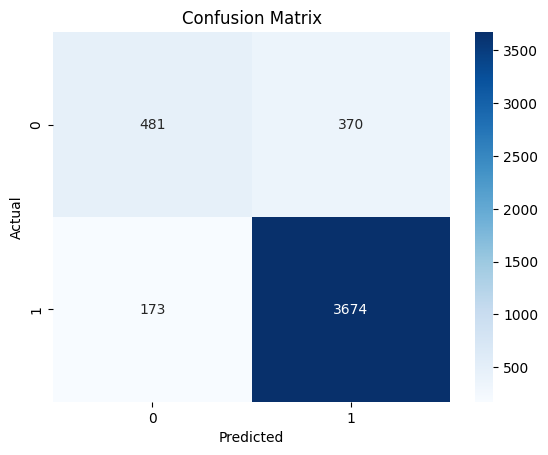

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

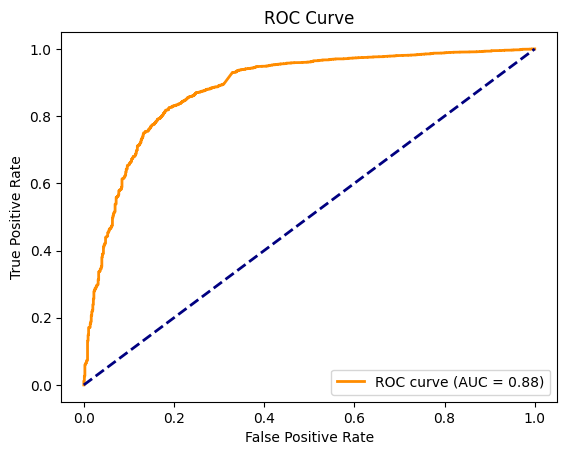

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# GRU model

In [ ]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=maxlen),
    GRU(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8369 - loss: 0.4129 - val_accuracy: 0.8731 - val_loss: 0.3018
Epoch 2/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 47s 80ms/step - accuracy: 0.9065 - loss: 0.2266 - val_accuracy: 0.8902 - val_loss: 0.2572
Epoch 3/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.9283 - loss: 0.1847 - val_accuracy: 0.8827 - val_loss: 0.2723
Epoch 4/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.9350 - loss: 0.1649 - val_accuracy: 0.8836 - val_loss: 0.2813
Epoch 5/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 47s 80ms/step - accuracy: 0.9472 - loss: 0.1372 - val_accuracy: 0.8917 - val_loss: 0.3116
Epoch 6/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.9601 - loss: 0.1089 - val_accuracy: 0.8831 - val_loss: 0.3176
Epoch 7/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.9667 - loss: 0.0928 - val_accuracy: 0.8846 - val_loss: 0.3559
Epoch 8/10
588/588 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.9710 - loss: 0.0831 - 

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int32')

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6766    0.6122    0.6428       851
           1     0.9160    0.9353    0.9255      3847

    accuracy                         0.8768      4698
   macro avg     0.7963    0.7737    0.7842      4698
weighted avg     0.8726    0.8768    0.8743      4698



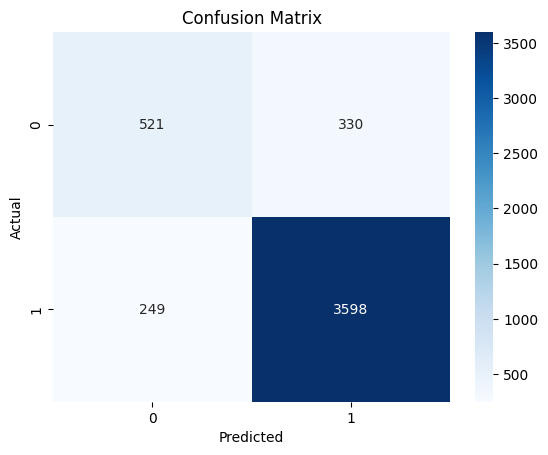

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

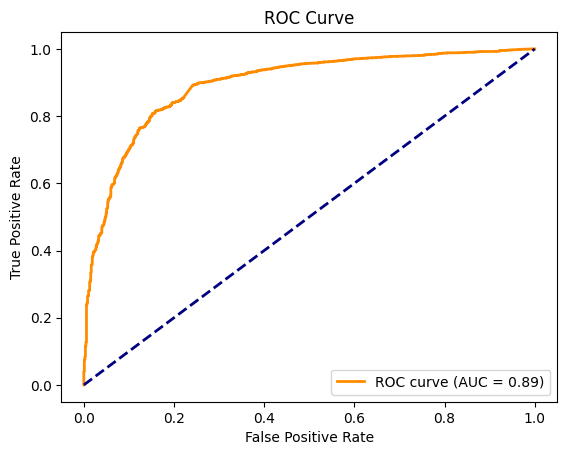

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# PYTORCH RNN, LSTM, GRU models

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocessing

In [ ]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/ReviewTokoBaju.csv"
df = pd.read_csv(url)

In [ ]:
texts = df['Review Text'].fillna('').values
labels = df['Recommended IND'].values

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

texts = np.array([clean_text(t) for t in texts])

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)
y = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RNN Model

In [ ]:
class ReviewDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.LongTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = ReviewDataset(X_train, y_train)
test_dataset = ReviewDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        output, hidden = self.rnn(x)
        out = self.fc(hidden.squeeze(0))
        out = self.sigmoid(out)
        return out

vocab_size = 5000
embed_size = 64
hidden_size = 64
output_size = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RNNModel(vocab_size, embed_size, hidden_size, output_size).to(device)

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses, test_losses = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

In [ ]:
model.eval()
val_loss = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, targets)
        val_loss += loss.item()
test_losses.append(val_loss / len(test_loader))

print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')


Epoch [10/10], Train Loss: 0.2753, Test Loss: 0.3456


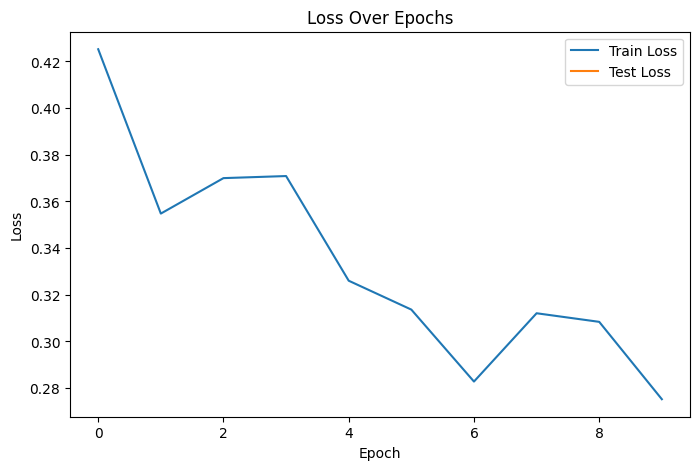

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.eval()
y_true, y_pred_prob = [], []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs).squeeze()
        y_pred_prob.extend(outputs.cpu().numpy())
        y_true.extend(targets.numpy())

y_pred = (np.array(y_pred_prob) > 0.5).astype('int')

In [ ]:
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.6683    0.4947    0.5685       851
         1.0     0.8943    0.9457    0.9193      3847

    accuracy                         0.8640      4698
   macro avg     0.7813    0.7202    0.7439      4698
weighted avg     0.8534    0.8640    0.8557      4698



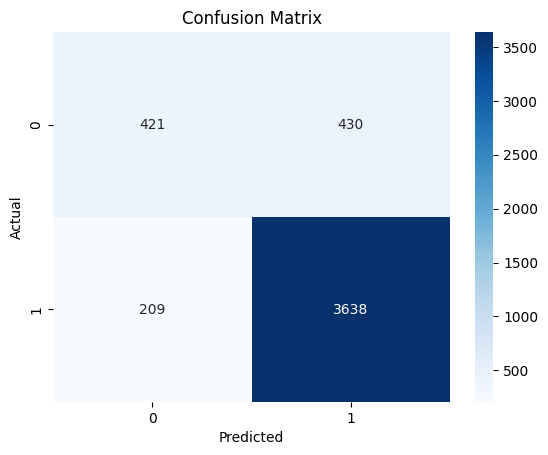

In [ ]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

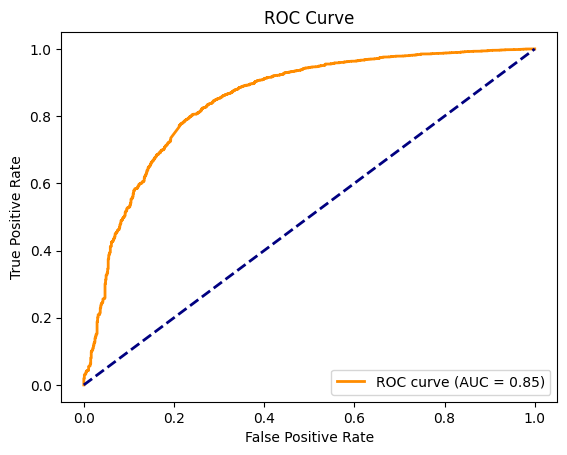

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# LSTM Modul

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, cell) = self.lstm(x)
        out = self.fc(hidden.squeeze(0))
        out = self.sigmoid(out)
        return out

In [ ]:
model_lstm = LSTMModel(vocab_size, embed_size, hidden_size, output_size).to(device)

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses_lstm, test_losses_lstm = [], []

for epoch in range(num_epochs):
    model_lstm.train()
    running_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model_lstm(inputs).squeeze()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses_lstm.append(running_loss / len(train_loader))

In [ ]:
model_lstm.eval()
val_loss = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model_lstm(inputs).squeeze()
        loss = criterion(outputs, targets)
        val_loss += loss.item()
test_losses_lstm.append(val_loss / len(test_loader))

print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses_lstm[-1]:.4f}, Test Loss: {test_losses_lstm[-1]:.4f}')

Epoch [10/10], Train Loss: 0.0907, Test Loss: 0.3379


In [ ]:
model_lstm.eval()
y_true_lstm, y_pred_prob_lstm = [], []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        outputs = model_lstm(inputs).squeeze()
        y_pred_prob_lstm.extend(outputs.cpu().numpy())
        y_true_lstm.extend(targets.numpy())

y_pred_lstm = (np.array(y_pred_prob_lstm) > 0.5).astype('int')

In [ ]:
print(classification_report(y_true_lstm, y_pred_lstm, digits=4))

              precision    recall  f1-score   support

         0.0     0.6999    0.6439    0.6707       851
         1.0     0.9226    0.9389    0.9307      3847

    accuracy                         0.8855      4698
   macro avg     0.8112    0.7914    0.8007      4698
weighted avg     0.8823    0.8855    0.8836      4698



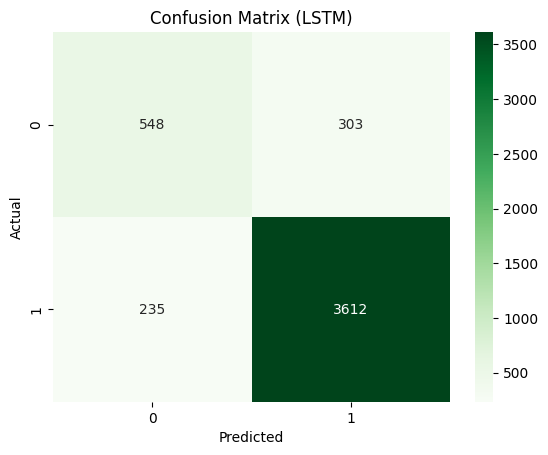

In [ ]:
cm_lstm = confusion_matrix(y_true_lstm, y_pred_lstm)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LSTM)')
plt.show()

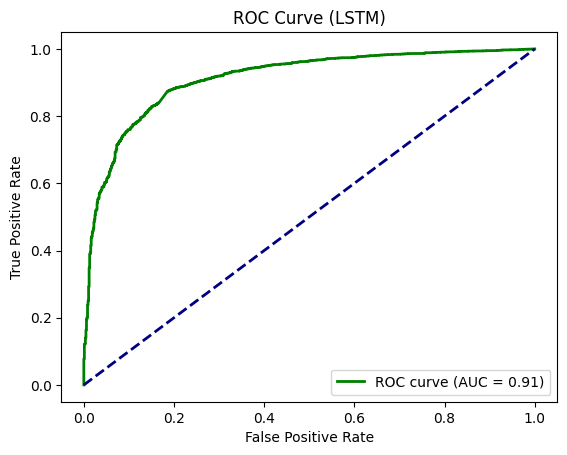

In [ ]:
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_true_lstm, y_pred_prob_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

plt.figure()
plt.plot(fpr_lstm, tpr_lstm, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_lstm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LSTM)')
plt.legend(loc='lower right')
plt.show()

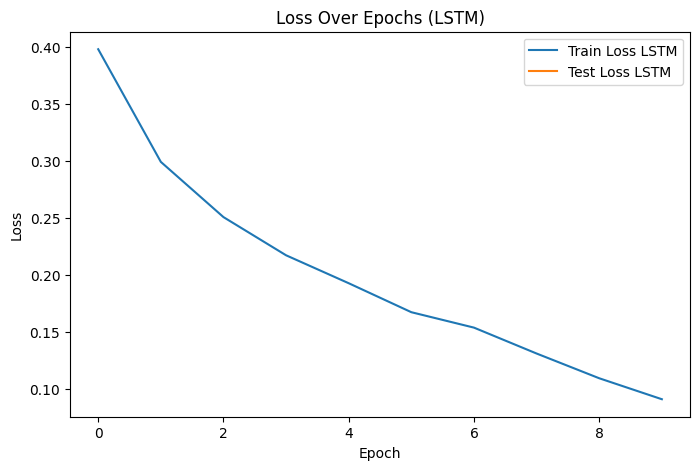

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train_losses_lstm, label='Train Loss LSTM')
plt.plot(test_losses_lstm, label='Test Loss LSTM')
plt.title('Loss Over Epochs (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## GRU Modul

In [ ]:
class GRUModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.gru = nn.GRU(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        output, hidden = self.gru(x)
        out = self.fc(hidden.squeeze(0))
        out = self.sigmoid(out)
        return out

In [ ]:
model_gru = GRUModel(vocab_size, embed_size, hidden_size, output_size).to(device)

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model_gru.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses_gru, test_losses_gru = [], []

for epoch in range(num_epochs):
    model_gru.train()
    running_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model_gru(inputs).squeeze()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses_gru.append(running_loss / len(train_loader))

In [ ]:
model_gru.eval()
val_loss = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model_gru(inputs).squeeze()
        loss = criterion(outputs, targets)
        val_loss += loss.item()
test_losses_gru.append(val_loss / len(test_loader))

print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses_gru[-1]:.4f}, Test Loss: {test_losses_gru[-1]:.4f}')

Epoch [10/10], Train Loss: 0.0584, Test Loss: 0.4641


In [ ]:
model_gru.eval()
y_true_gru, y_pred_prob_gru = [], []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        outputs = model_gru(inputs).squeeze()
        y_pred_prob_gru.extend(outputs.cpu().numpy())
        y_true_gru.extend(targets.numpy())

y_pred_gru = (np.array(y_pred_prob_gru) > 0.5).astype('int')

In [ ]:
print(classification_report(y_true_gru, y_pred_gru, digits=4))

              precision    recall  f1-score   support

         0.0     0.6980    0.6110    0.6516       851
         1.0     0.9163    0.9415    0.9287      3847

    accuracy                         0.8817      4698
   macro avg     0.8071    0.7763    0.7902      4698
weighted avg     0.8767    0.8817    0.8785      4698



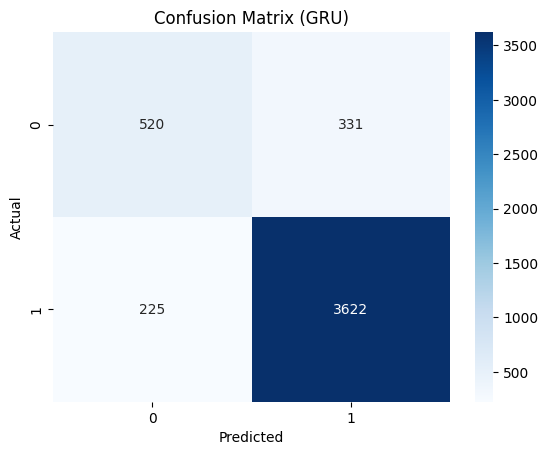

In [ ]:
cm_gru = confusion_matrix(y_true_gru, y_pred_gru)
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (GRU)')
plt.show()

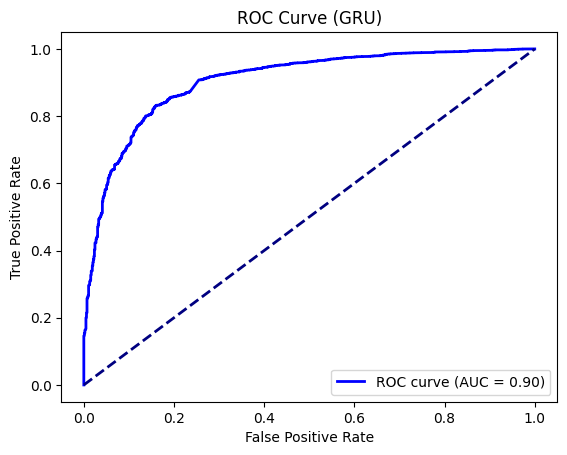

In [ ]:
fpr_gru, tpr_gru, thresholds_gru = roc_curve(y_true_gru, y_pred_prob_gru)
roc_auc_gru = auc(fpr_gru, tpr_gru)

plt.figure()
plt.plot(fpr_gru, tpr_gru, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_gru)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (GRU)')
plt.legend(loc='lower right')
plt.show()